In [1]:
! pip install wordclouds
! pip install nltk
! pip install seaborn
! pip install vaderSentiment
! pip install xlrd
! pip install python-dateutil
! pip install langdetect
! pip install unidecode

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import pandas as pd
from datetime import datetime
import re

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import itertools
import collections
import string
import dateutil

import networkx as nx
import os
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ERROR: Could not find a version that satisfies the requirement wordclouds
ERROR: No matching distribution found for wordclouds


In [2]:
df = pd.read_csv("tweets_steve_jobs.csv")
df['Tweet'] = df['Tweet'].str.replace('\W', ' ', regex=True)

df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'], format="%Y-%m-%d %H:%M:%S")
df['Date_time'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

df['Tweet'] = df['Tweet'].apply(str)
df['day'] = pd.DatetimeIndex(df['Date']).day
df['month'] = pd.DatetimeIndex(df['Date']).month

df.head(10)

,ID,Date,Username,Tweet,Date_time,day,month
0,1,2011-08-01,Adsmith47,Dear Steve Jobs The idea of the Airport is t...,2011-08-01 23:58:34+00:00,1,8
1,2,2011-08-01,DavyAdams,IT is a thankless job the best we can hope is...,2011-08-01 23:55:07+00:00,1,8
2,3,2011-08-01,DopeOnRepeat,LGStateofMind haha thanks but i only got a c...,2011-08-01 23:43:59+00:00,1,8
3,4,2011-08-01,lisaplvnv,Steve Jobs impersonator has a full head of hai...,2011-08-01 23:34:49+00:00,1,8
4,5,2011-08-01,DeesMuscles,Steve Jobs is a genius I love him RT tonyrob...,2011-08-01 23:30:42+00:00,1,8
5,6,2011-08-01,toshamasuke,Don Äôt be trapped by dogma Äì which is livi...,2011-08-01 23:17:47+00:00,1,8
6,7,2011-08-01,benag,RT antichrista The bad news is I slept poorl...,2011-08-01 23:16:38+00:00,1,8
7,8,2011-08-01,RichardCorn,JesusPalma Steve Jobs is moot haha,2011-08-01 23:09:52+00:00,1,8
8,9,2011-08-01,toshamasuke,Your time is limited so don Äôt waste it liv...,2011-08-01 23:04:29+00:00,1,8
9,10,2011-08-01,SocialGreg,Steve Jobs Innovation is Saying ÄòNo Äô to 1...,2011-08-01 23:04:03+00:00,1,8


In [3]:

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
# Removing stop words
stop_words = stopwords.words("english")

df['Tweets_clean'] = df['Tweet'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df['Tweets_clean'] = df['Tweets_clean'].str.replace('\d+', '')

df["Tweets_clean"]

<ipython-input-4-a6008cec8d3a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweets_clean'] = df['Tweets_clean'].str.replace('\d+', '')


0         Dear Steve Jobs The idea Airport stay connecte...
1         IT thankless job best hope become invisible St...
2         LGStateofMind haha thanks got couple weeks lef...
3         Steve Jobs impersonator full head hair He fact...
4         Steve Jobs genius I love RT tonyrobbins Apple ...
                                ...                        
105845    RT novaspivack Steve Jobs last words OH WOW OH...
105846    Äú kissane The best things written since death...
105847    Death happen Steve achieved Mona Simpson Steve...
105848    Steve Jobs sister remembers life death pretty ...
105849    Interesting glimpse life death RT sarahw Mona ...
Name: Tweets_clean, Length: 105850, dtype: object

In [5]:
# TOKENIZATION
tt = TweetTokenizer()
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
df["Tweets_clean"] = df["Tweets_clean"].apply(tt.tokenize)

lmtzr = WordNetLemmatizer()

df["Tweets_clean"] = df["Tweets_clean"].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
import re
p = re.compile(r'[^\w\s]+')
df["Tweets_clean"] = [p.sub('', x) for x in df["Tweets_clean"].tolist()]

#df["Tweets_clean"] = df["Tweets_clean"].str.replace('[^\w\s]','')
df["Tweets_clean"]

0         Dear Steve Jobs The idea Airport stay connecte...
1         IT thankless job best hope become invisible St...
2         LGStateofMind haha thanks got couple week left...
3         Steve Jobs impersonator full head hair He fact...
4         Steve Jobs genius I love RT tonyrobbins Apple ...
                                ...                        
105845    RT novaspivack Steve Jobs last word OH WOW OH ...
105846    Äú kissane The best thing written since death ...
105847    Death happen Steve achieved Mona Simpson Steve...
105848    Steve Jobs sister remembers life death pretty ...
105849    Interesting glimpse life death RT sarahw Mona ...
Name: Tweets_clean, Length: 105850, dtype: object

In [6]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in df['Tweets_clean']]
df_no_urls[:1]

lower_case = [word.lower() for word in df['Tweets_clean']]
sentences = df['Tweets_clean']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['dear',
  'steve',
  'jobs',
  'the',
  'idea',
  'airport',
  'stay',
  'connected',
  'please',
  'fix',
  'thank',
  'you'],
 ['it',
  'thankless',
  'job',
  'best',
  'hope',
  'become',
  'invisible',
  'steve',
  'duplessie',
  'iii']]

In [7]:
# second cleaning 
stop_words = stopwords.words('english')
# Remove stop words from each list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]
df_nsw

[['dear',
  'steve',
  'jobs',
  'idea',
  'airport',
  'stay',
  'connected',
  'please',
  'fix',
  'thank'],
 ['thankless',
  'job',
  'best',
  'hope',
  'become',
  'invisible',
  'steve',
  'duplessie',
  'iii'],
 ['lgstateofmind',
  'haha',
  'thanks',
  'got',
  'couple',
  'week',
  'left',
  'steve',
  'jobs',
  'really',
  'gonna',
  'rule',
  'world',
  'one',
  'day'],
 ['steve',
  'jobs',
  'impersonator',
  'full',
  'head',
  'hair',
  'fact',
  'american',
  'actor',
  'director',
  'full',
  'head',
  'http',
  'bit',
  'ly',
  'nbdax'],
 ['steve',
  'jobs',
  'genius',
  'love',
  'rt',
  'tonyrobbins',
  'apple',
  'cash',
  'entire',
  'us',
  'government',
  'brother',
  'cont',
  'http',
  'tl',
  'gd',
  'cqakh'],
 ['trapped',
  'dogma',
  'living',
  'result',
  'people',
  'thinking',
  'steve',
  'job'],
 ['rt',
  'antichrista',
  'bad',
  'news',
  'slept',
  'poorly',
  'crazy',
  'dream',
  'last',
  'night',
  'good',
  'news',
  'steve',
  'job',
  'cont

In [8]:
# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('steve', 113728),
 ('jobs', 104252),
 ('http', 61654),
 ('co', 60557),
 ('death', 54217),
 ('apple', 34242),
 ('rt', 14079),
 ('job', 10732),
 ('day', 9399),
 ('ceo', 7904),
 ('life', 6905),
 ('blackberry', 6538),
 ('silence', 6348),
 ('dear', 6041),
 ('stevejobs', 5869),
 ('news', 5481),
 ('like', 5074),
 ('think', 5028),
 ('via', 4977),
 ('iphone', 4973)]

In [9]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,steve,113728
1,jobs,104252
2,http,61654
3,co,60557
4,death,54217
...,...,...
95,health,1294
96,biography,1265
97,continuous,1249
98,many,1241


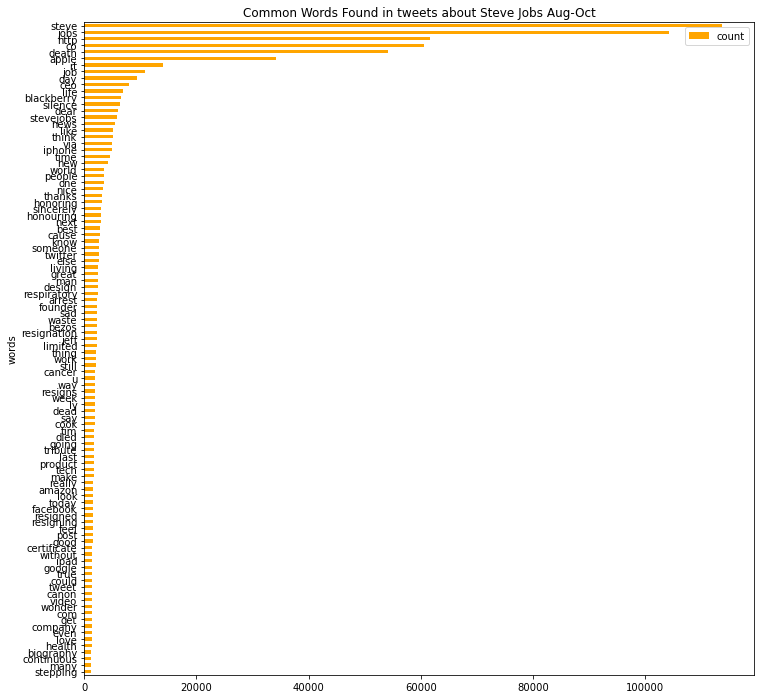

In [10]:
# plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in tweets about Steve Jobs Aug-Oct")

plt.show()

In [11]:
text = clean_df_ncw.iloc[:, 0]
text

0          steve
1           jobs
2           http
3             co
4          death
         ...    
95        health
96     biography
97    continuous
98          many
99      stepping
Name: words, Length: 100, dtype: object

<Figure size 432x288 with 0 Axes>

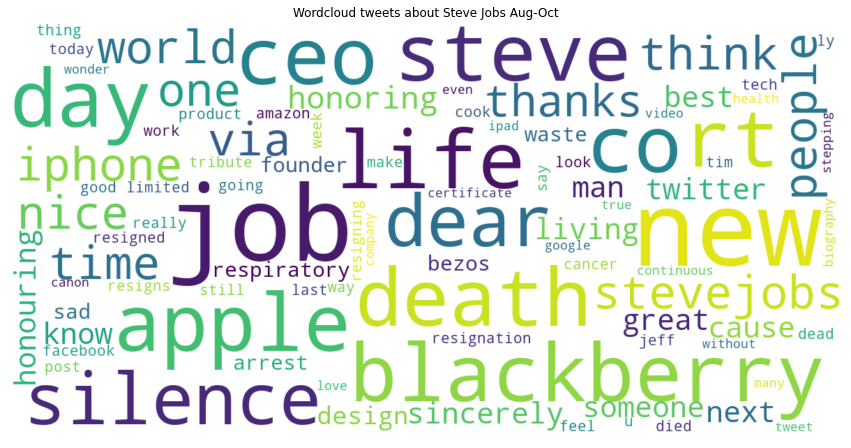

In [12]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud tweets about Steve Jobs Aug-Oct"
plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")

In [13]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

In [14]:
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
df_results = pd.DataFrame(sentimentScore(df['Tweets_clean']))
df=pd.merge(df, df_results, left_index=True, right_index=True)
df.set_index('Date', inplace=True)
df = df.sort_values('compound', ascending = False)
df

,ID,Username,Tweet,Date_time,day,month,Tweets_clean,neg,neu,pos,compound
Date,,,,,,,,,,,
2011-10-06,67297,markaiden50,how comes the Good die steve job is death th...,2011-10-06 16:12:40+00:00,6,10,come Good die steve job death co founder ipod ...,0.064,0.057,0.879,0.9971
2011-08-24,13250,jordandroid,now he is Steve quit his Job s HA HA HA ...,2011-08-24 23:05:44+00:00,24,8,Steve quit Job HA HA HA HA HA HA HA HA HA HA H...,0.000,0.043,0.957,0.9964
2011-08-26,28095,sgeegs89,I know this is yesterday s news But kudos to ...,2011-08-26 04:47:27+00:00,26,8,I know yesterday news But kudos Stevejobs quit...,0.000,0.305,0.695,0.9771
2011-09-11,45156,ELovemakeup,1SteveBurton love love u Are u anything li...,2011-09-11 00:44:41+00:00,11,9,SteveBurton love love u Are u anything like Ja...,0.000,0.362,0.638,0.9769
2011-08-16,4468,OwnedYourPS3ASS,SLUM_DOGG Ha ha ha and when i say EVEN IF in ...,2011-08-16 07:49:20+00:00,16,8,SLUM_DOGG Ha ha ha say EVEN IF big lettering m...,0.000,0.294,0.706,0.9744
...,...,...,...,...,...,...,...,...,...,...,...
2011-10-10,84404,roospooscreate,shame on you for disrespecting steve jobs deat...,2011-10-10 17:40:34+00:00,10,10,shame disrespecting steve job death stealing a...,0.771,0.229,0.000,-0.9738
2011-10-06,61388,GreatWeen,Okay I know Steve Jobs death was sad but WTF...,2011-10-06 20:09:14+00:00,6,10,Okay I know Steve Jobs death sad WTF sorrowful...,0.607,0.346,0.047,-0.9767
2011-10-11,88621,misscellophane,I heard today Steve Jobs died of an asthma att...,2011-10-11 05:09:10+00:00,11,10,I heard today Steve Jobs died asthma attack ca...,0.674,0.326,0.000,-0.9771


In [15]:
df['polarity']=(df.pos-df.neg)/(df.pos+df.neg)
df

,ID,Username,Tweet,Date_time,day,month,Tweets_clean,neg,neu,pos,compound,polarity
Date,,,,,,,,,,,,
2011-10-06,67297,markaiden50,how comes the Good die steve job is death th...,2011-10-06 16:12:40+00:00,6,10,come Good die steve job death co founder ipod ...,0.064,0.057,0.879,0.9971,0.864263
2011-08-24,13250,jordandroid,now he is Steve quit his Job s HA HA HA ...,2011-08-24 23:05:44+00:00,24,8,Steve quit Job HA HA HA HA HA HA HA HA HA HA H...,0.000,0.043,0.957,0.9964,1.000000
2011-08-26,28095,sgeegs89,I know this is yesterday s news But kudos to ...,2011-08-26 04:47:27+00:00,26,8,I know yesterday news But kudos Stevejobs quit...,0.000,0.305,0.695,0.9771,1.000000
2011-09-11,45156,ELovemakeup,1SteveBurton love love u Are u anything li...,2011-09-11 00:44:41+00:00,11,9,SteveBurton love love u Are u anything like Ja...,0.000,0.362,0.638,0.9769,1.000000
2011-08-16,4468,OwnedYourPS3ASS,SLUM_DOGG Ha ha ha and when i say EVEN IF in ...,2011-08-16 07:49:20+00:00,16,8,SLUM_DOGG Ha ha ha say EVEN IF big lettering m...,0.000,0.294,0.706,0.9744,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-10,84404,roospooscreate,shame on you for disrespecting steve jobs deat...,2011-10-10 17:40:34+00:00,10,10,shame disrespecting steve job death stealing a...,0.771,0.229,0.000,-0.9738,-1.000000
2011-10-06,61388,GreatWeen,Okay I know Steve Jobs death was sad but WTF...,2011-10-06 20:09:14+00:00,6,10,Okay I know Steve Jobs death sad WTF sorrowful...,0.607,0.346,0.047,-0.9767,-0.856269
2011-10-11,88621,misscellophane,I heard today Steve Jobs died of an asthma att...,2011-10-11 05:09:10+00:00,11,10,I heard today Steve Jobs died asthma attack ca...,0.674,0.326,0.000,-0.9771,-1.000000


/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


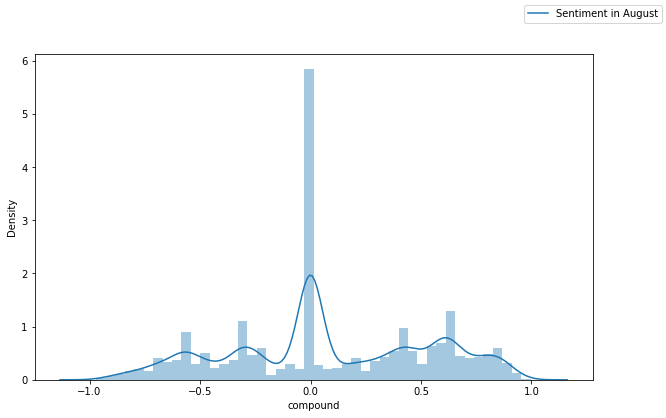

/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


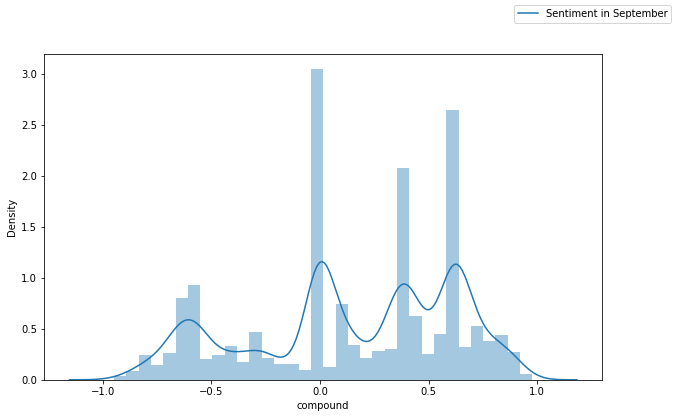

/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


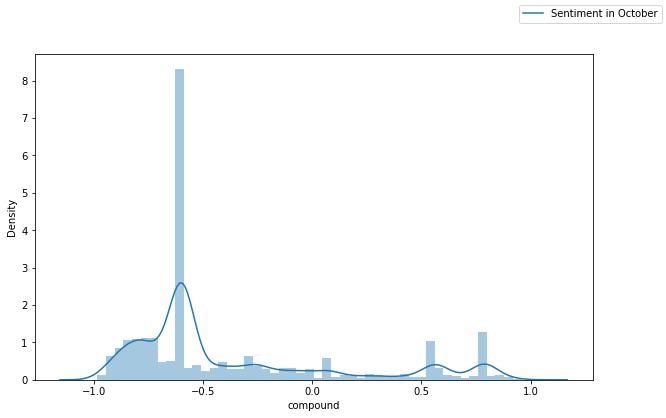

In [16]:
# plot sentiment distribution by Month

import seaborn as sns

fig = plt.figure(figsize=(10,6))
label = "Sentiment evening"
plot=df.loc[df['month'] == 8]
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment in August"])
plt.show()

fig = plt.figure(figsize=(10,6))
label = "Sentiment afternoon"
plot=df.loc[df['month'] == 9]
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment in September"])
plt.show()

fig = plt.figure(figsize=(10,6))
label = "Sentiment monring"
plot=df.loc[df['month'] == 10]
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment in October"])
plt.show()


In [17]:
df.index = pd.to_datetime(df.index)

#averages per day
sentiment=df['compound'].resample("d").mean()
polarity=df['polarity'].resample("d").mean()
sentiment

Date
2011-08-01    0.209485
2011-08-02    0.155599
2011-08-03    0.253885
2011-08-04    0.201106
2011-08-05    0.322579
                ...   
2011-10-27   -0.534547
2011-10-28   -0.523023
2011-10-29   -0.437835
2011-10-30   -0.344406
2011-10-31   -0.432447
Freq: D, Name: compound, Length: 92, dtype: float64

Populating the interactive namespace from numpy and matplotlib


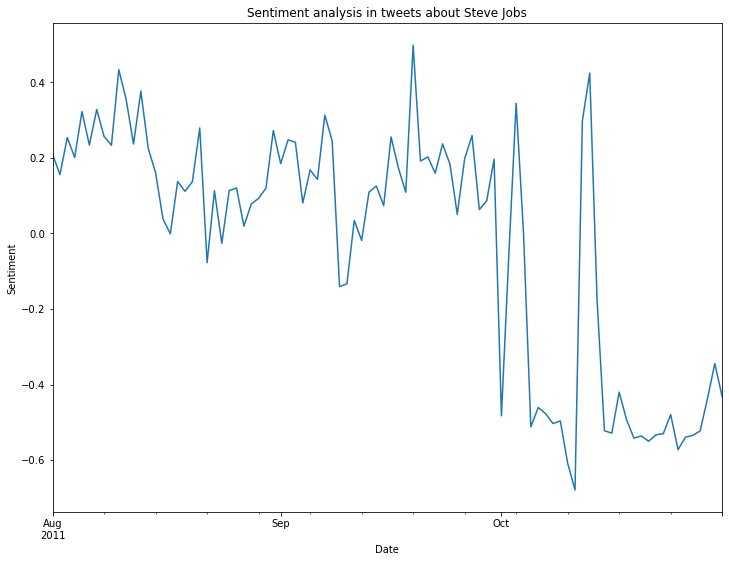

In [21]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 9) 

sentiment.plot()
plt.xlabel('Date')
plt.ylabel('Sentiment') 
plt.title('Sentiment analysis in tweets about Steve Jobs') 
plt.show()
plt.show()

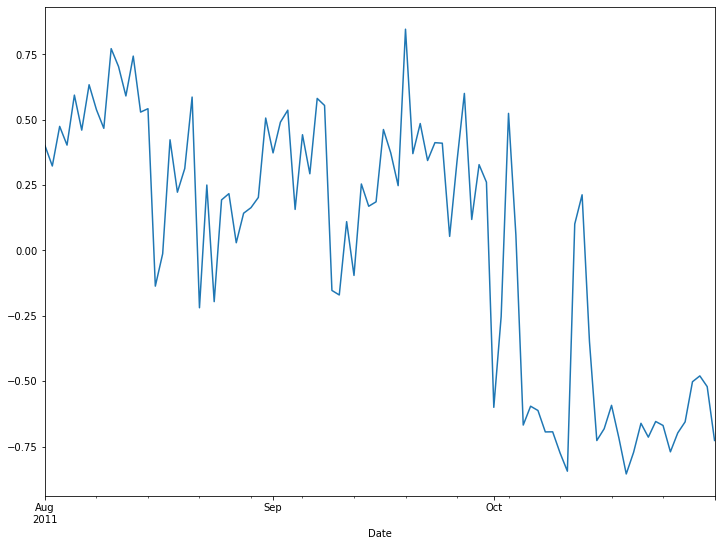

In [22]:
polarity.plot()
plt.show()

In [23]:
final_df = df.groupby(['Date'])['polarity','compound'].mean()
final_df

<ipython-input-23-c4d34b1b62c2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df = df.groupby(['Date'])['polarity','compound'].mean()


,polarity,compound
Date,,
2011-08-01,0.401031,0.209485
2011-08-02,0.322874,0.155599
2011-08-03,0.474322,0.253885
2011-08-04,0.402786,0.201106
2011-08-05,0.593881,0.322579
...,...,...
2011-10-27,-0.655582,-0.534547
2011-10-28,-0.502130,-0.523023
2011-10-29,-0.479827,-0.437835


In [24]:
final_df.to_csv("Sentiment_Analysis_tweets.csv")